## Linear Regression using numpy

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import IPython.display as display

np.linspace(1.0, 10.0, 100): This is a function call to np.linspace(), which generates an array of 100 evenly spaced values between 1.0 and 10.0. The resulting array is one-dimensional.

[:, np.newaxis]: This is a slice operation that adds an extra dimension to the array. The : operator means "select all elements", and np.newaxis is a special index that adds an extra dimension. This is useful when you need to perform operations that require a certain number of dimensions.

So, data_x is a two-dimensional NumPy array with 100 rows and 1 column, where the values in the first column range from 1.0 to 10.0, evenly spaced.

In [52]:
data_x = np. linspace (1.0, 10.0, 100) [:, np. newaxis]
data_y = np. sin (data_x) + 0.1*pow(data_x,2) + 0.5*np. random. randn(100,1)
data_x /= np. max (data_x)

- Dividing data_x by its maximum value is called normalization and helps keeping the algorithm numerically stable

/var/folders/mn/5fylbrm10lgccyd8xqnr0cgm0000gn/T/ipykernel_98337/1682632954.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(data_x, data_y, "ro", color = "blue")


Text(0.5, 1.0, 'Visualisation of the data')

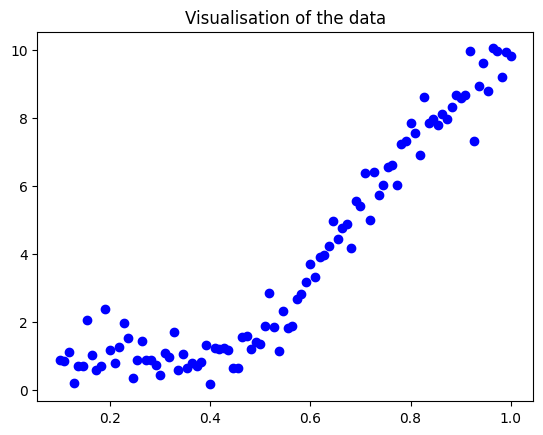

In [53]:
plt.plot(data_x, data_y, "ro", color = "blue")
plt.title("Visualisation of the data")

In [54]:
data_x = np.hstack((np.ones_like(data_x), data_x))

As mentioned previously we now split the data into training data, testing data and validation data

In [55]:
order = np.random.permutation(len(data_x)) # Randomly shuffle the data
portion = 20 # Takes the data in chunks of 20
test_x = data_x[order[portion:]]
test_y = data_y[order[:portion]]
train_x = data_x[order[portion:]]
train_y = data_y[order[portion:]]

#### Implementation of Gradient Descent 

In [56]:
def gradient(w, x, y):
    y_estimate = x.dot(w).flatten()
    error = (y.flatten() - y_estimate)
    gradient = -(1.0/len(x)) * error.dot(x)
    return gradient, error**2

#### Function to Plot our Model

In [61]:
def plot_regression_line(x, y, w, iteration):
    display.clear_output(wait=True)
    plt.scatter(x[:, 1], y, color='blue', label='Data Points')  # assuming x[:, 1] is your feature column
    plt.title(f'Linear Regression - Iteration {iteration}')
    plt.xlabel('Independent variable')
    plt.ylabel('Dependent variable')

    # Calculate the regression line for plotting
    line_x = np.linspace(np.min(x[:, 1]), np.max(x[:, 1]), 100)
    # Adjust this if train_x has more than 2 columns of features
    line_y = w[0] + np.sum(w[1:] * line_x[:, np.newaxis], axis=1)
    
    # Ideal prediction line
    ideal_line_y = ideal_w[0] + ideal_w[1] * line_x
    plt.plot(line_x, ideal_line_y, color='green', label='Ideal Line', linestyle='--')

    plt.plot(line_x, line_y, color='red', label='Regression Line')
    plt.legend()
    plt.pause(0.01)
    plt.show()

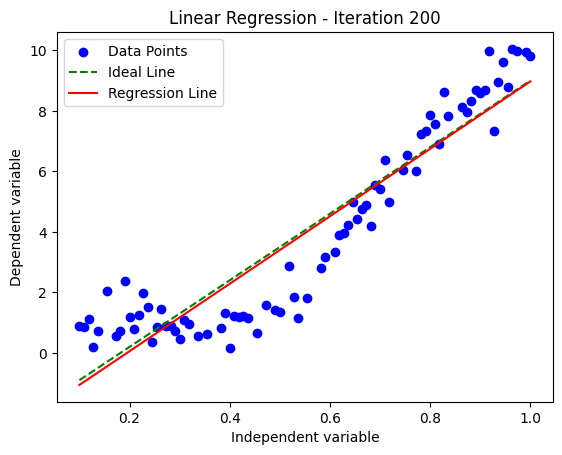

Max iterations reached.


In [86]:
w = np.random.randn(2)
ideal_w = [-2, 11]
alpha = 0.5
tolerance = 1e-5
max_iter = 200

# Perform Gradient Descent
iterations = 1
while True:
    g, error = gradient(w, train_x, train_y)
    new_w = w - alpha * g

    # * Stopping Condition
    if np.max(np.abs(new_w - w)) < tolerance:
        print("Converged.")
        break

    # Print error every 50 iterations
    if iterations % 100 == 0:
        print("Iteration: %d - Error: %.4f" %(iterations, np.mean(error)))
    
    # Plotting the model
    if np.max(np.abs(new_w - w)) >= tolerance:  # Only plot if the model has not yet converged
        plot_regression_line(train_x, train_y, new_w, iterations)
    
    if iterations == max_iter:
        print("Max iterations reached.")
        break

    iterations += 1
    w = new_w

